In [1]:
#Set up SQL in Google Colab

!pip install ipython-sql

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 16.2 MB/s eta 0:00:00


In [2]:
#Bring in the tools to read CVS and create database in memory

import pandas as pd
import sqlite3

In [3]:
#Uploading the dataset

from google.colab import files
uploaded = files.upload()

Saving AB_NYC_2019.csv to AB_NYC_2019.csv


In [4]:
#Read and clean the file

df = pd.read_csv("AB_NYC_2019.csv")
df['name'] = df['name'].fillna("Unknown")
df['host_name'] = df['host_name'].fillna("Unknown")


In [5]:
#Create an SQLite database and load the dataset into a table called 'airbnb_nyc'
import sqlite3

conn = sqlite3.connect("airbnb_nyc.db")

 # Load data into table
df.to_sql("airbnb_nyc", conn, if_exists="replace", index=False)

48895

In [6]:
#Activating SQL support inside the notebook
%reload_ext sql

#Connecting SQL to the database
%sql sqlite:///airbnb_nyc.db


In [8]:

#Showing the average price per night for listings in each NYC borough
query = """

SELECT neighbourhood_group,
       ROUND(AVG(price), 2) AS avg_price
FROM airbnb_nyc
GROUP BY neighbourhood_group
ORDER BY avg_price DESC;
"""

pd.read_sql_query(query, conn)


,neighbourhood_group,avg_price
0,Manhattan,196.88
1,Brooklyn,124.38
2,Staten Island,114.81
3,Queens,99.52
4,Bronx,87.50


In [9]:
#Top 10 Most Expensive Listings

query = """
SELECT name, neighbourhood_group, neighbourhood, room_type, price
FROM airbnb_nyc
WHERE price > 0
ORDER BY price DESC
LIMIT 10;
"""

top_expensive = pd.read_sql_query(query, conn)
top_expensive

,name,neighbourhood_group,neighbourhood,room_type,price
0,Furnished room in Astoria apartment,Queens,Astoria,Private room,10000
1,Luxury 1 bedroom apt. -stunning Manhattan views,Brooklyn,Greenpoint,Entire home/apt,10000
2,1-BR Lincoln Center,Manhattan,Upper West Side,Entire home/apt,10000
3,Spanish Harlem Apt,Manhattan,East Harlem,Entire home/apt,9999
4,"Quiet, Clean, Lit @ LES & Chinatown",Manhattan,Lower East Side,Private room,9999
5,2br - The Heart of NYC: Manhattans Lower East ...,Manhattan,Lower East Side,Entire home/apt,9999
6,Beautiful/Spacious 1 bed luxury flat-TriBeCa/Soho,Manhattan,Tribeca,Entire home/apt,8500
7,Film Location,Brooklyn,Clinton Hill,Entire home/apt,8000
8,East 72nd Townhouse by (Hidden by Airbnb),Manhattan,Upper East Side,Entire home/apt,7703
9,70' Luxury MotorYacht on the Hudson,Manhattan,Battery Park City,Entire home/apt,7500


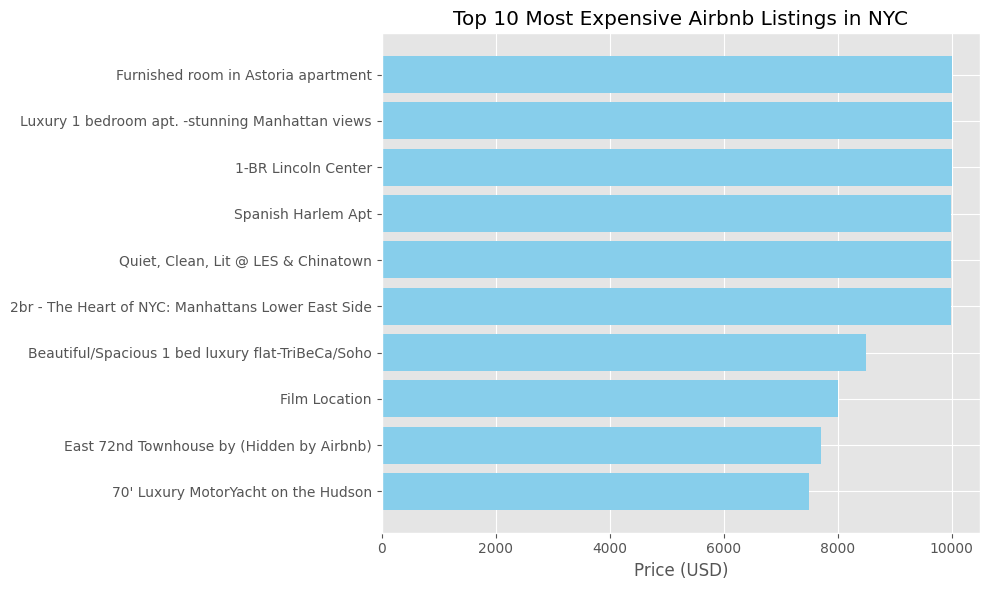

In [12]:
import matplotlib.pyplot as plt


# Plot
plt.style.use('ggplot')
plt.figure(figsize=(10, 6))
plt.barh(top_expensive['name'], top_expensive['price'], color='skyblue')
plt.xlabel("Price (USD)")
plt.title("Top 10 Most Expensive Airbnb Listings in NYC")
plt.gca().invert_yaxis()  # Most expensive at the top
plt.tight_layout()
plt.show()


In [14]:
#Top 10 Hosts

query = """
SELECT host_id, host_name, COUNT(*) AS total_listings
FROM airbnb_nyc
GROUP BY host_id, host_name
ORDER BY total_listings DESC
LIMIT 10;
"""

top_hosts = pd.read_sql_query(query, conn)
top_hosts



,host_id,host_name,total_listings
0,219517861,Sonder (NYC),327
1,107434423,Blueground,232
2,30283594,Kara,121
3,137358866,Kazuya,103
4,12243051,Sonder,96
5,16098958,Jeremy & Laura,96
6,61391963,Corporate Housing,91
7,22541573,Ken,87
8,200380610,Pranjal,65
9,1475015,Mike,52


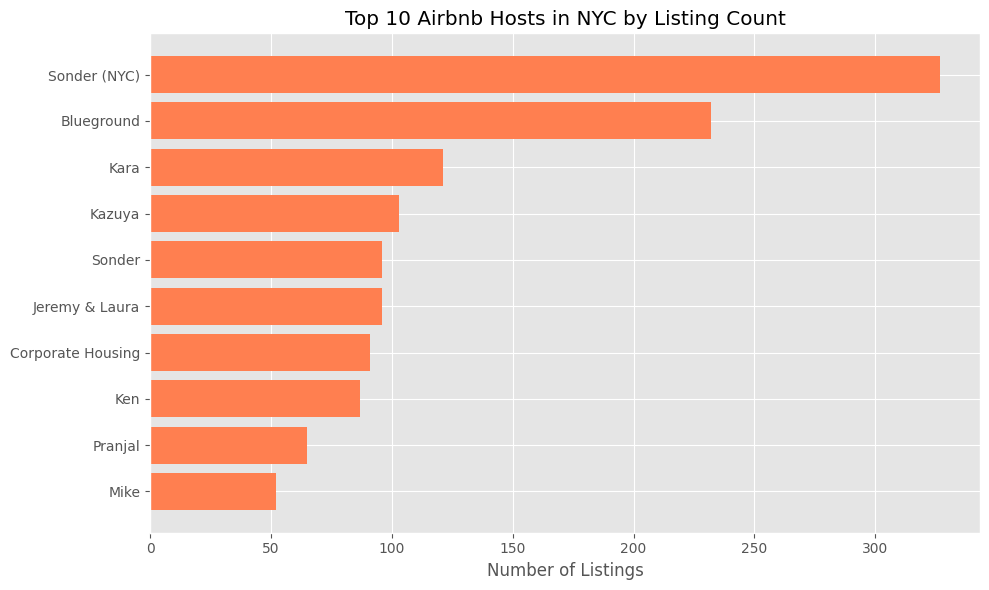

In [15]:
import matplotlib.pyplot as plt




# Plot
plt.style.use('ggplot')
plt.figure(figsize=(10, 6))
plt.barh(top_hosts['host_name'], top_hosts['total_listings'], color='coral')
plt.xlabel("Number of Listings")
plt.title("Top 10 Airbnb Hosts in NYC by Listing Count")
plt.gca().invert_yaxis()  # Highest at the top
plt.tight_layout()
plt.show()


In [16]:
#Room Count per Borough

query = """
SELECT neighbourhood_group, room_type, COUNT(*) AS room_count
FROM airbnb_nyc
GROUP BY neighbourhood_group, room_type
ORDER BY neighbourhood_group, room_type;
"""

room_distribution = pd.read_sql_query(query, conn)
room_distribution


,neighbourhood_group,room_type,room_count
0,Bronx,Entire home/apt,379
1,Bronx,Private room,652
2,Bronx,Shared room,60
3,Brooklyn,Entire home/apt,9559
4,Brooklyn,Private room,10132
5,Brooklyn,Shared room,413
6,Manhattan,Entire home/apt,13199
7,Manhattan,Private room,7982
8,Manhattan,Shared room,480
9,Queens,Entire home/apt,2096


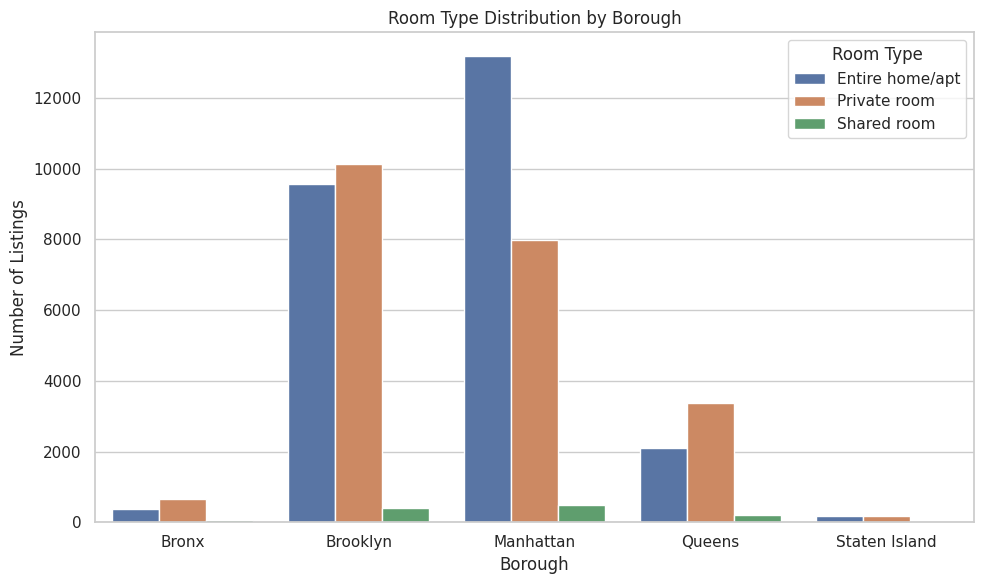

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=room_distribution,
            x='neighbourhood_group',
            y='room_count',
            hue='room_type')

plt.title("Room Type Distribution by Borough")
plt.xlabel("Borough")
plt.ylabel("Number of Listings")
plt.legend(title='Room Type')
plt.tight_layout()
plt.show()


In [18]:
#Most Available Neighborhoods (Year-Round)

query = """
SELECT neighbourhood,
       ROUND(AVG(availability_365), 1) AS avg_days_available
FROM airbnb_nyc
GROUP BY neighbourhood
ORDER BY avg_days_available DESC
LIMIT 10;
"""

most_available = pd.read_sql_query(query, conn)
most_available



,neighbourhood,avg_days_available
0,Fort Wadsworth,365.0
1,Co-op City,364.0
2,Willowbrook,351.0
3,Eastchester,333.5
4,Richmondtown,300.0
5,Mill Basin,290.0
6,Edgemere,275.3
7,Randall Manor,275.2
8,West Brighton,274.7
9,Spuyten Duyvil,270.0


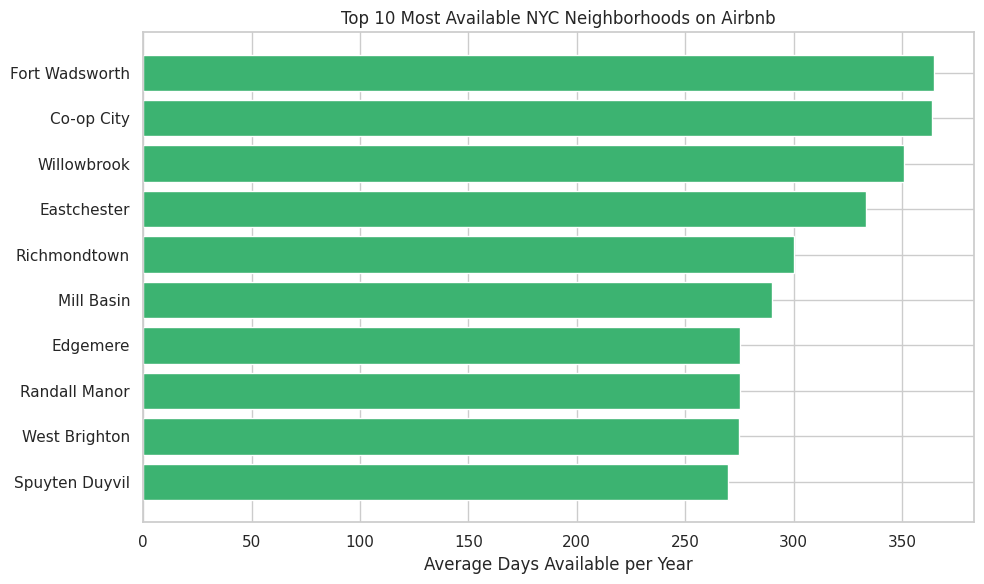

In [22]:
import matplotlib.pyplot as plt

# Plot
plt.figure(figsize=(10, 6))
plt.barh(most_available['neighbourhood'],
         most_available['avg_days_available'],
         color='mediumseagreen')

plt.xlabel("Average Days Available per Year")
plt.title("Top 10 Most Available NYC Neighborhoods on Airbnb")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


In [23]:
#Host Trust Index

query = """
SELECT host_id, host_name,
       AVG(number_of_reviews) AS avg_reviews,
       AVG(reviews_per_month) AS avg_reviews_per_month,
       AVG(calculated_host_listings_count) AS avg_total_listings,
       AVG(availability_365) AS avg_availability,
       -- Composite trust score (normalized sum)
       (AVG(reviews_per_month) +
        AVG(number_of_reviews)/100 +
        AVG(availability_365)/100 +
        CASE WHEN AVG(calculated_host_listings_count) <= 3 THEN 1 ELSE 0.5 END
       ) AS trust_score
FROM airbnb_nyc
GROUP BY host_id, host_name
ORDER BY trust_score DESC
LIMIT 10;
"""

top_trusted_hosts = pd.read_sql_query(query, conn)
top_trusted_hosts


,host_id,host_name,avg_reviews,avg_reviews_per_month,avg_total_listings,avg_availability,trust_score
0,228415932,Louann,37.000000,20.940000,1.0,134.000000,23.650000
1,47621202,Dona,602.500000,13.990000,2.0,253.000000,23.545000
2,156684502,Nalicia,348.666667,18.126667,3.0,25.666667,22.870000
3,244361589,Row NYC,33.888889,18.620000,9.0,292.555556,22.384444
4,26432133,Danielle,403.400000,13.604000,5.0,288.600000,21.024000
5,154705359,Anabell,259.000000,12.990000,1.0,307.000000,19.650000
6,97086824,Miss Dy,434.000000,12.840000,1.0,102.000000,19.200000
7,111841534,Malini,392.000000,13.150000,1.0,71.000000,18.780000
8,217379941,Brent,132.000000,15.780000,1.0,28.000000,18.380000
9,4734398,Jj,599.333333,7.680000,3.0,324.666667,17.920000


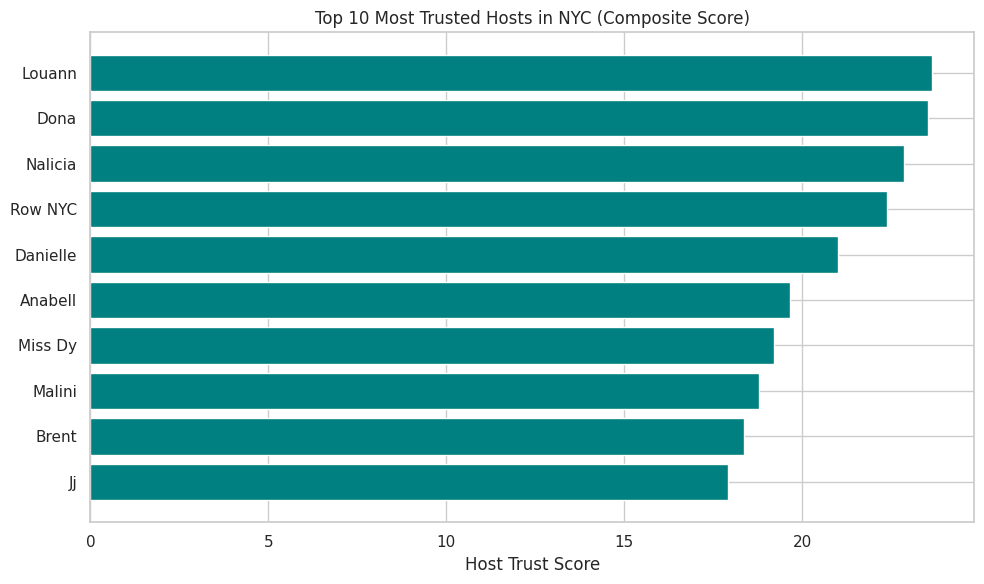

In [24]:
plt.figure(figsize=(10, 6))
plt.barh(top_trusted_hosts['host_name'],
         top_trusted_hosts['trust_score'],
         color='teal')
plt.xlabel("Host Trust Score")
plt.title("Top 10 Most Trusted Hosts in NYC (Composite Score)")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


In [31]:
#Rank hosts within each borough by trust score or listing count using ROW_NUMBER() inside a CTE

query = """
WITH HostRanked AS (
    SELECT host_id, host_name, neighbourhood_group,
           COUNT(*) AS listing_count,
           ROW_NUMBER() OVER (
               PARTITION BY neighbourhood_group
               ORDER BY COUNT(*) DESC
           ) AS rank_within_borough
    FROM airbnb_nyc
    GROUP BY host_id, host_name, neighbourhood_group
)
SELECT *
FROM HostRanked
WHERE rank_within_borough <= 3;
"""

top_hosts_ranked = pd.read_sql_query(query, conn)
top_hosts_ranked


,host_id,host_name,neighbourhood_group,listing_count,rank_within_borough
0,310670,Vie,Bronx,13,1
1,23878336,Armando,Bronx,10,2
2,30509656,Orit,Bronx,8,3
3,7503643,Vida,Brooklyn,52,1
4,26377263,Stat,Brooklyn,35,2
5,119669058,Melissa,Brooklyn,34,3
6,219517861,Sonder (NYC),Manhattan,327,1
7,107434423,Blueground,Manhattan,230,2
8,30283594,Kara,Manhattan,121,3
9,137358866,Kazuya,Queens,79,1


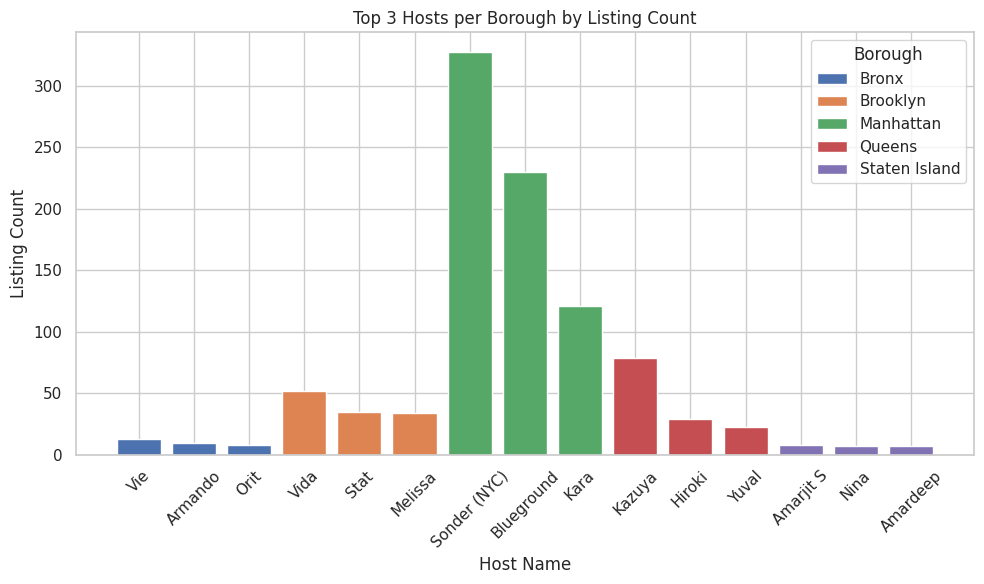

In [32]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
for borough in top_hosts_ranked['neighbourhood_group'].unique():
    subset = top_hosts_ranked[top_hosts_ranked['neighbourhood_group'] == borough]
    plt.bar(subset['host_name'], subset['listing_count'], label=borough)

plt.title("Top 3 Hosts per Borough by Listing Count")
plt.xlabel("Host Name")
plt.ylabel("Listing Count")
plt.xticks(rotation=45)
plt.legend(title="Borough")
plt.tight_layout()
plt.show()

In [25]:
#Average Location & Price by Borough

query = """
SELECT neighbourhood_group,
       ROUND(AVG(latitude), 5) AS avg_latitude,
       ROUND(AVG(longitude), 5) AS avg_longitude,
       ROUND(AVG(price), 2) AS avg_price,
       COUNT(*) AS listing_count
FROM airbnb_nyc
GROUP BY neighbourhood_group
ORDER BY avg_price DESC;
"""

borough_geo = pd.read_sql_query(query, conn)
borough_geo


,neighbourhood_group,avg_latitude,avg_longitude,avg_price,listing_count
0,Manhattan,40.76506,-73.97461,196.88,21661
1,Brooklyn,40.68504,-73.95119,124.38,20104
2,Staten Island,40.61022,-74.10581,114.81,373
3,Queens,40.73153,-73.87277,99.52,5666
4,Bronx,40.84830,-73.88455,87.50,1091


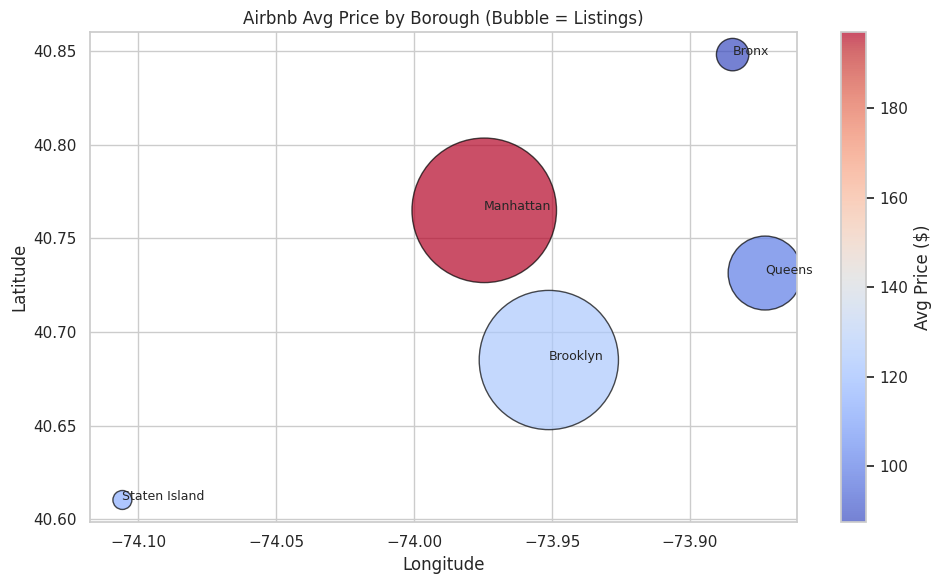

In [26]:
plt.figure(figsize=(10, 6))
plt.scatter(
    borough_geo['avg_longitude'],
    borough_geo['avg_latitude'],
    s=borough_geo['listing_count'] * 0.5,  # scale bubble size
    c=borough_geo['avg_price'],
    cmap='coolwarm',
    alpha=0.7,
    edgecolor='black'
)

for i, row in borough_geo.iterrows():
    plt.text(row['avg_longitude'], row['avg_latitude'], row['neighbourhood_group'], fontsize=9)

plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Airbnb Avg Price by Borough (Bubble = Listings)")
plt.colorbar(label='Avg Price ($)')
plt.tight_layout()
plt.show()


In [35]:
#Hosts in Manhattan charging above average
query = """
SELECT host_id, host_name, AVG(price) AS avg_host_price
FROM airbnb_nyc
WHERE neighbourhood_group = 'Manhattan'
GROUP BY host_id, host_name
HAVING AVG(price) > (
    SELECT AVG(price)
    FROM airbnb_nyc
    WHERE neighbourhood_group = 'Manhattan'
)
ORDER BY avg_host_price DESC
LIMIT 10;
"""

above_avg_hosts = pd.read_sql_query(query, conn)



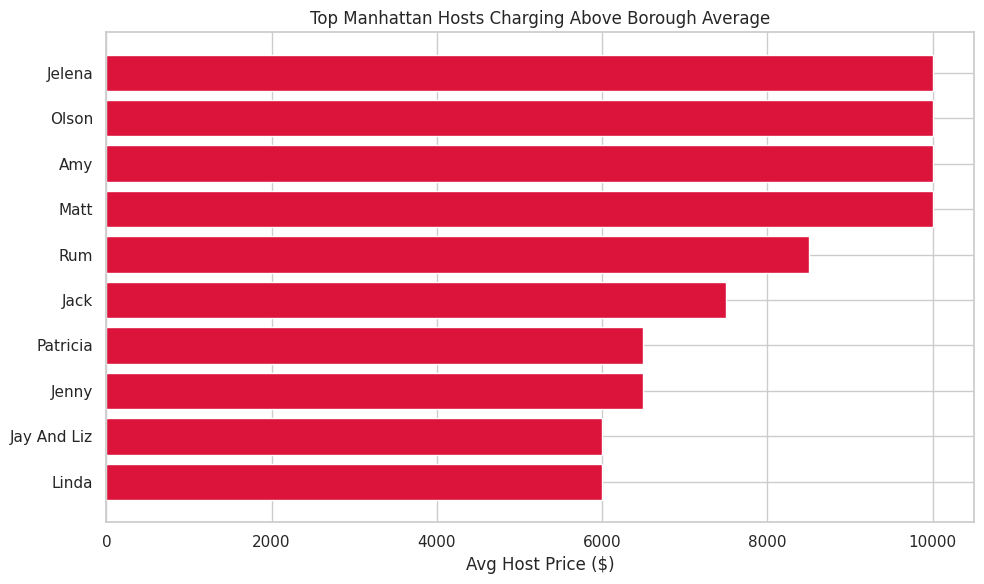

In [36]:

plt.figure(figsize=(10, 6))
plt.barh(above_avg_hosts['host_name'], above_avg_hosts['avg_host_price'], color='crimson')
plt.xlabel("Avg Host Price ($)")
plt.title("Top Manhattan Hosts Charging Above Borough Average")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


In [37]:
# Listings that are mid-priced, active, and fully available
query = """
SELECT neighbourhood, room_type, AVG(price) AS avg_price, COUNT(*) AS total_listings
FROM airbnb_nyc
WHERE price BETWEEN 50 AND 300
  AND number_of_reviews > 10
  AND availability_365 = 365
  AND neighbourhood_group IN ('Manhattan', 'Brooklyn')
GROUP BY neighbourhood, room_type
HAVING COUNT(*) > 5
ORDER BY avg_price DESC
LIMIT 10;
"""

filtered_neighborhoods = pd.read_sql_query(query, conn)




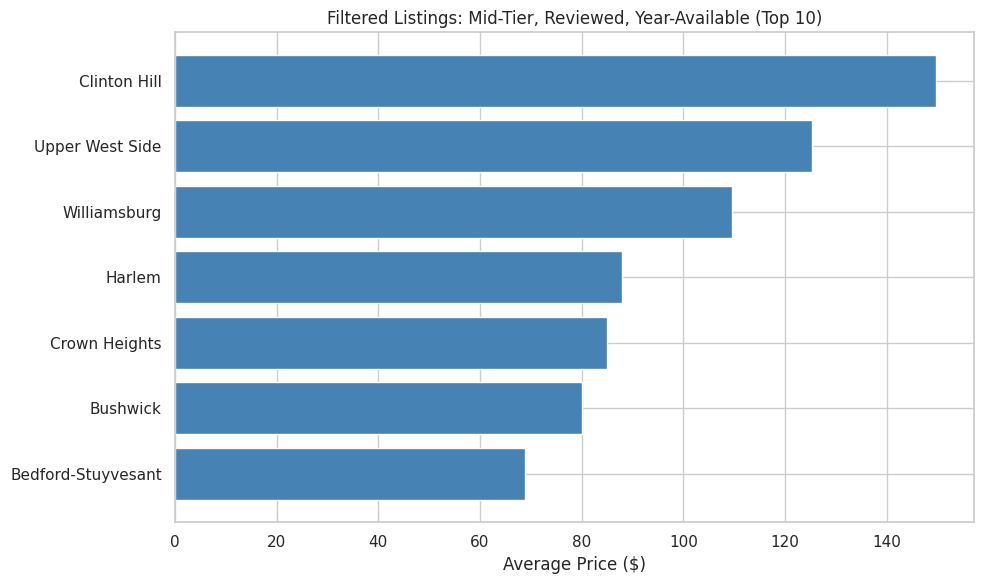

In [38]:

plt.figure(figsize=(10, 6))
plt.barh(filtered_neighborhoods['neighbourhood'], filtered_neighborhoods['avg_price'], color='steelblue')
plt.xlabel("Average Price ($)")
plt.title("Filtered Listings: Mid-Tier, Reviewed, Year-Available (Top 10)")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [39]:
#Rank boroughs for each room type by listing count
query = """
SELECT neighbourhood_group, room_type, COUNT(*) AS total_listings,
       RANK() OVER (PARTITION BY room_type ORDER BY COUNT(*) DESC) AS rank_within_type
FROM airbnb_nyc
GROUP BY neighbourhood_group, room_type;
"""

room_type_rankings = pd.read_sql_query(query, conn)




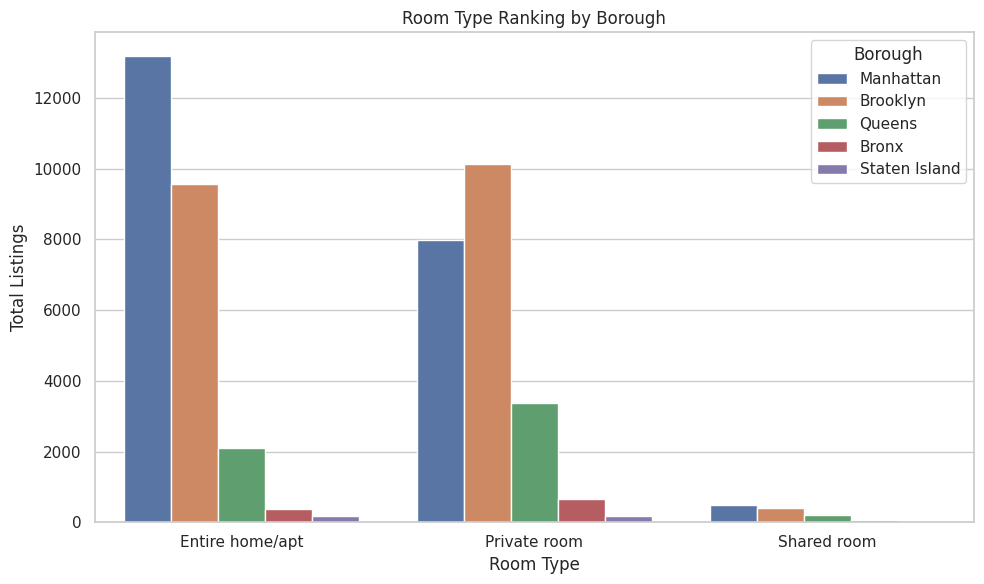

In [41]:

import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(data=room_type_rankings, x='room_type', y='total_listings', hue='neighbourhood_group')
plt.title("Room Type Ranking by Borough")
plt.xlabel("Room Type")
plt.ylabel("Total Listings")
plt.legend(title="Borough")
plt.tight_layout()
plt.show()